### 1. Reading MATLAB structure and saving to .csv

In [ ]:
import mat73

mat_fname = 'sub_all.mat'

mat_contents = mat73.loadmat(mat_fname)

mat_contents 

In [ ]:
len(mat_contents['subs_ica'])

15

In [ ]:
mat_contents['subs_ica'][0].keys()

dict_keys(['left_im1', 'left_im2', 'left_quasi', 'left_real', 'right_im1', 'right_im2', 'right_quasi', 'right_real'])

In [ ]:
# mat_contents['subs_ica'][0]

In [ ]:
# type(mat_contents['subs_ica'][0]['left_real']['trial'])

In [ ]:
# Typical shape of a trial

# mat_contents['subs_ica'][0]['left_real']['trial'][0]

In [ ]:
! pip install mne

In [ ]:
# Let's save all files for later reuse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import mne 
import os

def save_csv(mat_contents: dict ,save_folder: str, label: str):
    cnt_i = 0
    # left hand
    for i in mat_contents['subs_ica']:
        cnt_i += 1
        cnt_j = 0
        for j in i[label]['trial']:
            cnt_j += 1
            df = pd.DataFrame(j.T)
            df.to_csv(save_folder + f'/{label}/{cnt_i}_{cnt_j}.csv')

# save_csv(mat_contents = mat_contents, save_folder='../Motoric NeuroScience Data', label = 'right_im1')


### 2. Analyzing motorical dataset

In [ ]:
df_saved = pd.read_csv('../Motoric NeuroScience Data/left_real/1_1.csv')
df_saved = df_saved.drop(['Unnamed: 0'], axis=1)
df_saved.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,...,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03,9.972000e+03
mean,-5.272190e-21,5.740959e-22,-4.885495e-22,1.641402e-21,-2.322375e-21,-3.022418e-22,-1.255780e-21,5.035310e-22,-6.751121e-22,3.627836e-22,...,-6.385874e-22,-6.813765e-22,-1.212747e-22,2.720240e-22,-4.231767e-22,1.056668e-22,-3.566678e-22,-7.592888e-22,3.642727e-22,-2.833211e-22
std,9.136544e-06,6.749622e-06,5.286881e-06,8.782366e-06,6.866848e-06,7.509857e-06,3.173603e-06,2.997042e-06,5.284168e-06,7.345933e-06,...,4.956510e-06,3.480958e-06,7.183710e-06,7.657762e-06,7.532197e-06,6.655402e-06,5.245966e-06,7.769272e-06,6.354162e-06,6.497066e-06
min,-4.477565e-05,-2.583367e-05,-1.947242e-05,-3.785894e-05,-2.516494e-05,-2.494484e-05,-1.101083e-05,-9.524843e-06,-2.025414e-05,-2.609192e-05,...,-1.922561e-05,-1.183520e-05,-2.487087e-05,-2.705744e-05,-2.734037e-05,-2.101358e-05,-1.684020e-05,-2.830106e-05,-2.463780e-05,-2.513613e-05
25%,-5.803160e-06,-4.452933e-06,-3.250905e-06,-5.608915e-06,-4.740772e-06,-4.855862e-06,-2.228286e-06,-2.097966e-06,-3.587642e-06,-4.778554e-06,...,-3.334000e-06,-2.312010e-06,-4.691084e-06,-4.932317e-06,-5.033716e-06,-4.433171e-06,-3.586168e-06,-5.278353e-06,-4.443801e-06,-4.473604e-06
50%,2.744881e-07,-8.068661e-08,1.029275e-07,1.528440e-08,-1.416156e-08,3.897871e-08,-1.313871e-07,-2.097806e-08,-1.579780e-07,-1.578897e-08,...,-1.325961e-07,-5.899401e-09,-2.014584e-07,1.550812e-07,3.206238e-07,2.704520e-08,-1.328668e-07,5.949596e-08,3.926294e-08,-9.036624e-09
75%,6.053323e-06,4.547327e-06,3.490397e-06,5.630451e-06,4.528553e-06,5.003374e-06,2.085852e-06,1.994487e-06,3.282194e-06,4.741163e-06,...,3.218314e-06,2.308156e-06,4.464535e-06,4.996883e-06,4.904917e-06,4.411509e-06,3.493349e-06,4.881771e-06,4.402948e-06,4.508087e-06
max,2.556547e-05,2.245614e-05,1.762593e-05,3.065744e-05,2.320391e-05,2.333236e-05,1.372702e-05,1.040920e-05,2.095233e-05,2.927610e-05,...,1.786628e-05,1.413201e-05,3.122835e-05,2.907916e-05,2.931666e-05,2.530940e-05,2.182159e-05,3.282882e-05,2.233037e-05,2.251203e-05


In [ ]:
df_saved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9972 entries, 0 to 9971
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9972 non-null   float64
 1   1       9972 non-null   float64
 2   2       9972 non-null   float64
 3   3       9972 non-null   float64
 4   4       9972 non-null   float64
 5   5       9972 non-null   float64
 6   6       9972 non-null   float64
 7   7       9972 non-null   float64
 8   8       9972 non-null   float64
 9   9       9972 non-null   float64
 10  10      9972 non-null   float64
 11  11      9972 non-null   float64
 12  12      9972 non-null   float64
 13  13      9972 non-null   float64
 14  14      9972 non-null   float64
 15  15      9972 non-null   float64
 16  16      9972 non-null   float64
 17  17      9972 non-null   float64
 18  18      9972 non-null   float64
 19  19      9972 non-null   float64
 20  20      9972 non-null   float64
 21  21      9972 non-null   float64
 22  

**Exploratory Data Analysis** of original (Not fixed) dataset.

In [ ]:
rootdir = "../Motoric NeuroScience Data"
classes_tuple = ("left_real", "right_real", "left_im1", "right_im1")
patients_tuple = tuple(range(1, 16))

def form_data_tree(rootdir: str, classes_data: dict):
    for dirs, subdirs, files in os.walk(rootdir):
        key = dirs.split('/')[-1]
        if key in classes_tuple:
            patients_dict = {}
            for i in patients_tuple:
                patients_dict[i] = []
            classes_data[key] = patients_dict
            for file in files:
                patient_number = int(file.split('_')[0])
                data_link = os.path.join(dirs, file)
                classes_data[key][patient_number].append(data_link)
    return classes_data

def calc_len(folder_tree):
    length_list = []
    for i in folder_tree.values():
            for j in i.values():
                for path in j:
                    dataframe = pd.read_csv(path)
                    dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
                    length_list.append(dataframe.shape[0])
    return length_list

def analyze_mean(classes_data:dict):
    mean_value_dict = {key:[] for key in range(0,32)}
    for i in classes_data.values():
        for j in i.values():
            for path in j:
                dataframe = pd.read_csv(path)
                dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
                for k in range(0,32):
                    mean_value_dict[k].append(dataframe[str(k)].mean())
    return mean_value_dict

In [ ]:
classes_data = {} 
classes_data = form_data_tree(rootdir=rootdir, classes_data=classes_data)
classes_data

# dict of labels

classes = {"left_real": 0, "left_im1":0, "right_real": 1, "right_im1": 1}


In [ ]:
classes_data

{'left_im1': {1: ['../Motoric NeuroScience Data/left_im1/1_12.csv',
   '../Motoric NeuroScience Data/left_im1/1_15.csv',
   '../Motoric NeuroScience Data/left_im1/1_18.csv',
   '../Motoric NeuroScience Data/left_im1/1_11.csv',
   '../Motoric NeuroScience Data/left_im1/1_16.csv',
   '../Motoric NeuroScience Data/left_im1/1_7.csv',
   '../Motoric NeuroScience Data/left_im1/1_17.csv',
   '../Motoric NeuroScience Data/left_im1/1_20.csv',
   '../Motoric NeuroScience Data/left_im1/1_5.csv',
   '../Motoric NeuroScience Data/left_im1/1_3.csv',
   '../Motoric NeuroScience Data/left_im1/1_4.csv',
   '../Motoric NeuroScience Data/left_im1/1_8.csv',
   '../Motoric NeuroScience Data/left_im1/1_2.csv',
   '../Motoric NeuroScience Data/left_im1/1_19.csv',
   '../Motoric NeuroScience Data/left_im1/1_6.csv',
   '../Motoric NeuroScience Data/left_im1/1_14.csv',
   '../Motoric NeuroScience Data/left_im1/1_1.csv',
   '../Motoric NeuroScience Data/left_im1/1_10.csv',
   '../Motoric NeuroScience Data/left_i

In [ ]:
length_list = calc_len(classes_data)

print(f'Mean trial length in Original Dataset - {np.mean(length_list)}')

In [ ]:
mean_value_dict = analyze_mean(classes_data = classes_data)
# 
mean_value_df = pd.DataFrame.from_dict(mean_value_dict)
mean_value_df.shape


In [ ]:
mean_value_df.info()


In [ ]:
mean_value_df.describe()

In [ ]:
# Description of MEAN value df
mean_value_df.describe()

In [ ]:
# Analyzing № of Patients

for k,v in classes_data.items():
    for patient_number, data_list in v.items():
        print(f'Trials for patient number {patient_number} in {k}: {len(data_list)} \n')


### 3. Providing patient distribution

In [ ]:
# Правда, если было прочитано 2 папки.
# Если было прочитано 4 папки, то значение
# files_in_a_tree ≈ 2 * 569
files_in_a_tree = 569

def divide_to_folds(folder_tree, files_in_a_tree):

    number_of_folds = 4
    elements_per_list = files_in_a_tree/(15*2)
    part = ceil(elements_per_list/number_of_folds)

    fold_1, fold_2, fold_3, fold_4 = [], [], [], []

    # Classes_data - original Dataset:
    # It consists of 8*20 list of len = 25

    for i in folder_tree.values():
        for k,j in i.items():
            for filename in j[:part]:
                fold_1.append(filename)
            for filename in j[part: 2 * part]:
                fold_2.append(filename)
            for filename in j[2 * part: 3 * part]:
                fold_3.append(filename)
            for filename in j[3 * part: ]:
                fold_4.append(filename)

    return (fold_1, fold_2, fold_3, fold_4)


In [ ]:
folds_slice = divide_to_folds(classes_data, files_in_a_tree)

# for i in folds_slice:
#     print(len(i))


In [ ]:
for i in folds_slice:
    print(len(i))

300
300
300
244


Let's check, is our distribution OF PATIENTS even or not IN EVERY ITERATION of CUSTOM CV?

In [ ]:
class CV_iteration():
    def __init__(self, name: str, train_set: list, valid_set: list, test_set: list):
        self.name = name
        self.train_set = train_set
        self.valid_set = valid_set
        self.test_set = test_set


In [ ]:
iteration_original = CV_iteration('original', train_set=folds_slice[0]+folds_slice[1] +
                                  folds_slice[2], valid_set=folds_slice[3], test_set=folds_slice[3][len(folds_slice[3])//2:])

In [ ]:
def evaluate_iteration(iteration: CV_iteration):
    def check_distribution(part_of_dataset):
        patients_dict = {}
        for i in patients_tuple:
            patients_dict[i] = 0

        for i in patients_dict:
            for j in part_of_dataset:
                if int(j.split('/')[-1].split('_')[0]) == i:               # Getting the patient №
                    patients_dict[i] = patients_dict[i] + 1
        return patients_dict
    print(f'''Distribution of patients among train set of {iteration.name} is \n {check_distribution(iteration.train_set)} \n
              Distribution of patients among valid set of {iteration.name} is \n {check_distribution(iteration.valid_set)} \n
              Distribution of patients among test set of {iteration.name} is \n {check_distribution(iteration.test_set)} \n ''')


In [ ]:
evaluate_iteration(iteration_original)

Distribution of patients among train set of original is 
 {1: 60, 2: 60, 3: 60, 4: 60, 5: 60, 6: 60, 7: 60, 8: 60, 9: 60, 10: 60, 11: 60, 12: 60, 13: 60, 14: 60, 15: 60} 

              Distribution of patients among valid set of original is 
 {1: 20, 2: 17, 3: 15, 4: 20, 5: 15, 6: 16, 7: 14, 8: 16, 9: 17, 10: 8, 11: 18, 12: 18, 13: 19, 14: 16, 15: 15} 

              Distribution of patients among test set of original is 
 {1: 10, 2: 8, 3: 8, 4: 10, 5: 7, 6: 7, 7: 7, 8: 7, 9: 9, 10: 6, 11: 9, 12: 8, 13: 10, 14: 8, 15: 8} 
 


### 4. Creating dataloader

In [ ]:
# import pkg_resources
# pkg_resources.require("torch==1.8.2")


import torch
from torch.utils.data import Dataset, DataLoader

print("PyTorch Version: ", torch.__version__)

PyTorch Version:  1.8.2


/home/cv-worker/anaconda3/envs/neuro/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# torch.set_default_dtype(torch.float64)

In [ ]:
# Function for unifiing the length of the dataloader

def finding_max_len(filenames: dict):
    max_len = 0
    for i in filenames.values():
        for j in i.values():
            for path in j:
                df = pd.read_csv(path)
                df_len = df.shape[0]
                if df_len > max_len:
                    max_len = df_len
    return max_len

# MAX_LEN = finding_max_len(classes_data)

MAX_LEN = 10095


In [ ]:
print(MAX_LEN)

10095


In [ ]:
# function for making zero lists of n length

def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

# main preprocessing function

def fix_df(df: pd.DataFrame, zero_list_function, MAX_LEN: int):
    df = df.drop(['Unnamed: 0'], axis=1)
    # Преобразование заголовков из str в int ДЛЯ ИЗБЕЖАНИЯ ОШИБОК
    df.columns = list(range(32))
    # ADD EXTRA ROWS HERE
    foundation = [zero_list_function(32) for i in range(MAX_LEN - len(df))]
    foundation = pd.DataFrame(foundation)
    df = pd.concat([df, foundation], ignore_index=True, axis=0)

    # Only select range between 5.5 and 8.5
    
    # df = df[5500:8500]
    

    return df


In [ ]:
df = pd.read_csv('../Motoric NeuroScience Data/left_real/1_1.csv')
df = fix_df(df, zerolistmaker, MAX_LEN)

df.shape

(10095, 32)

### 5. Analyzing dataset using MNE

NME визуализация нужных каналов

Creating RawArray with float64 data, n_channels=11, n_times=10095
    Range : 0 ... 10094 =      0.000 ...    10.094 secs
Ready.
Using matplotlib as 2D backend.


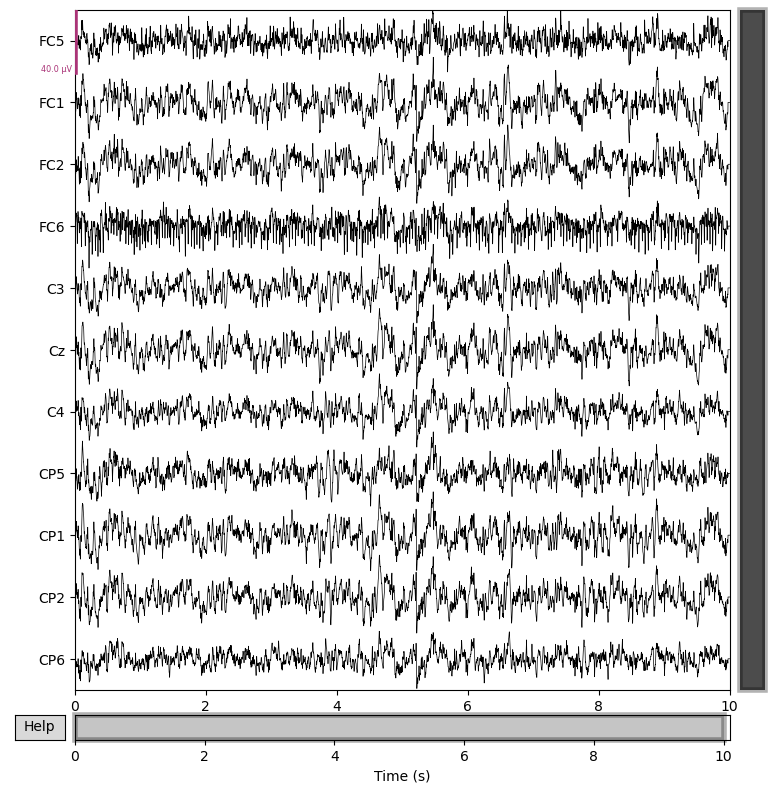

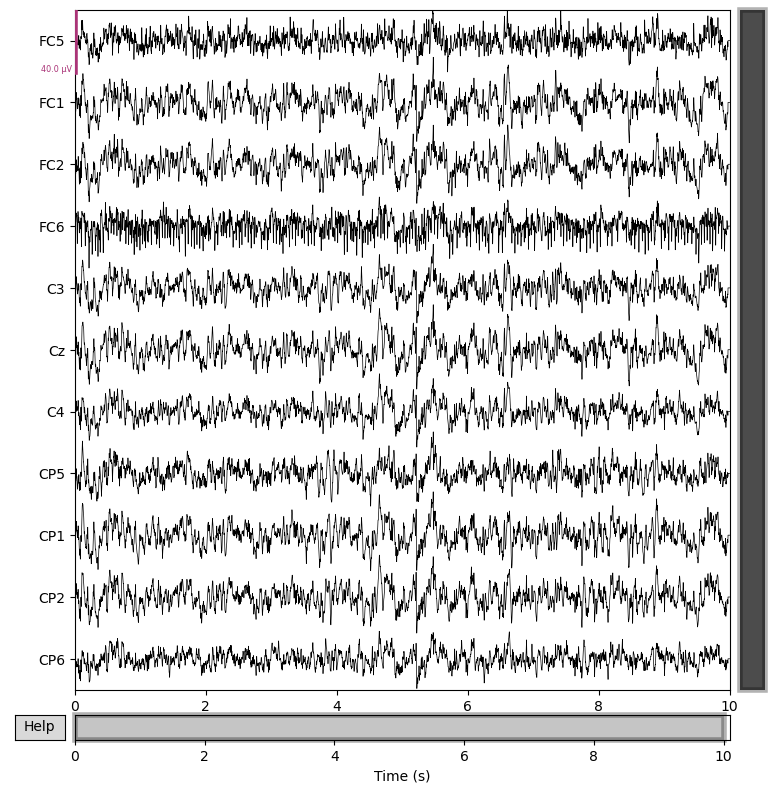

In [33]:
channel_names = ['FP1','FP2','F7','F3','Fz','F4','F8','FT9','FC5','FC1',
                'FC2','FC6','FT10','T7','C3','Cz','C4','T8','TP9','CP5',
                'CP1','CP2','CP6','TP10','P7','P3','Pz','P4','P8','O1',
                'Oz','O2']
channel_types = ['eeg']*32

# Filter the channels to keep only those containing 'C' in their names
ch_indices = [i for i, ch_name in enumerate(channel_names) if 'C' in ch_name]
channel_names = [channel_names[i] for i in ch_indices]
channel_types = [channel_types[i] for i in ch_indices]

# Create an info object that defines the channel names, types, and sampling frequency
info = mne.create_info(ch_names=channel_names, sfreq=1000, ch_types=channel_types)

np_eeg = df.iloc[:, ch_indices].to_numpy().T

# Create an MNE Raw object using the info object and the data
raw = mne.io.RawArray(np_eeg, info)

# Plot the raw data using MNE's plot function
raw.plot()

In [34]:
raw.times

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.0092e+01, 1.0093e+01,
       1.0094e+01])

In [35]:
arr = np.linspace(0, 10.094, 10095)

arr

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.0092e+01, 1.0093e+01,
       1.0094e+01])

MNE Baseline correction

Applying baseline correction (mode: mean)
Creating RawArray with float64 data, n_channels=11, n_times=10095
    Range : 0 ... 10094 =      0.000 ...    10.094 secs
Ready.


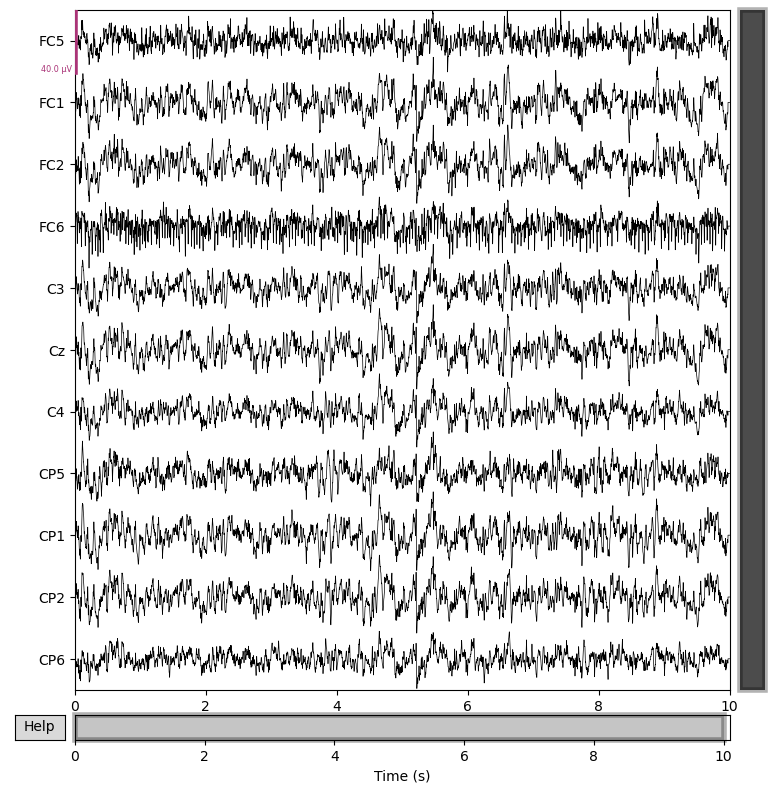

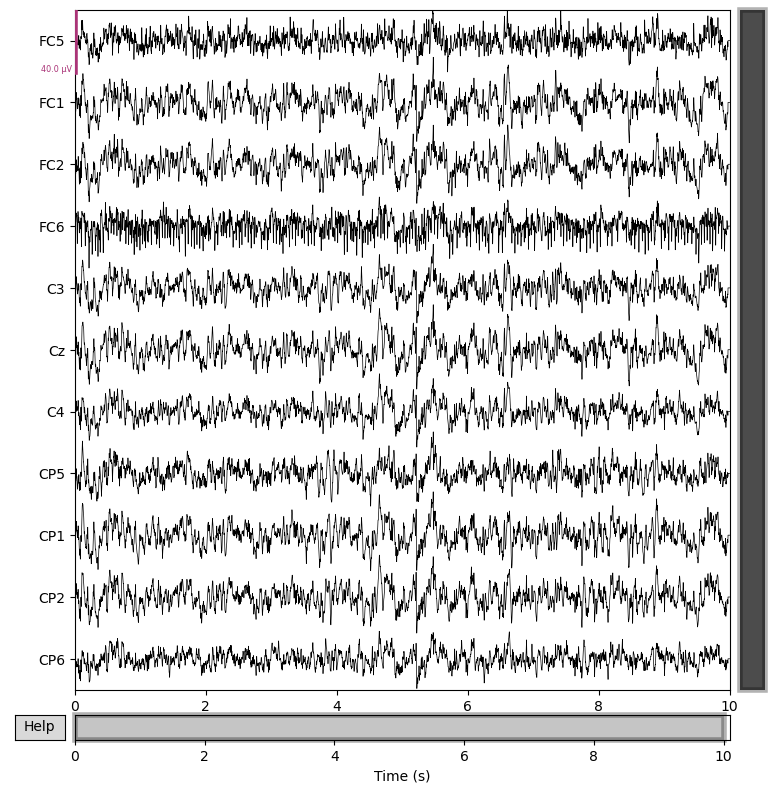

In [36]:
np_eeg = mne.baseline.rescale(raw.get_data(), raw.times, (0., 5.0), mode='mean', copy=False)

raw = mne.io.RawArray(np_eeg, info)

# Plot the raw data using MNE's plot function
raw.plot()

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 12.25 Hz)
- Filter length: 6601 samples (6.601 sec)

Creating RawArray with float64 data, n_channels=11, n_times=10095
    Range : 0 ... 10094 =      0.000 ...    10.094 secs
Ready.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished


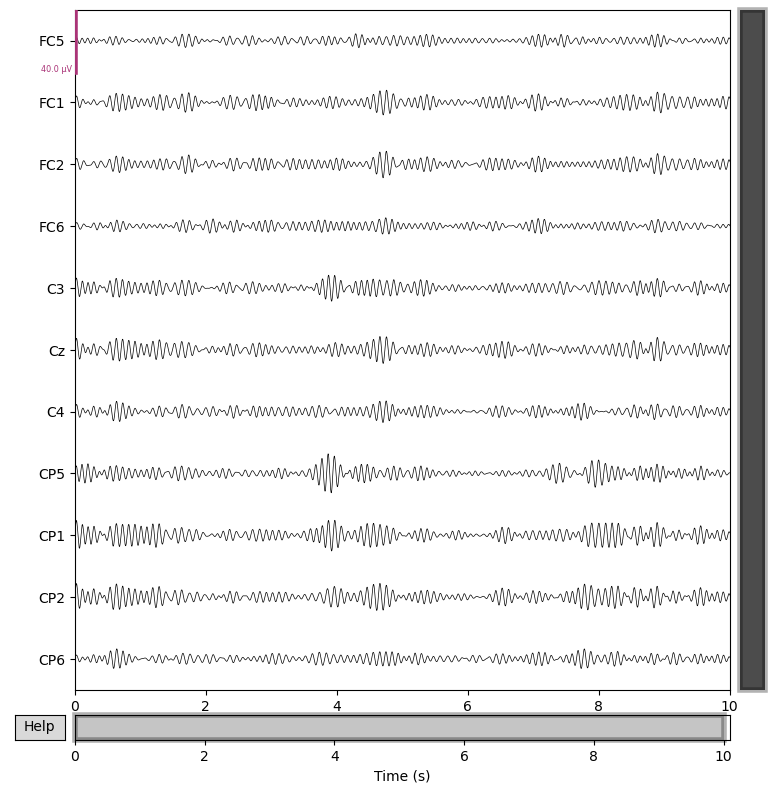

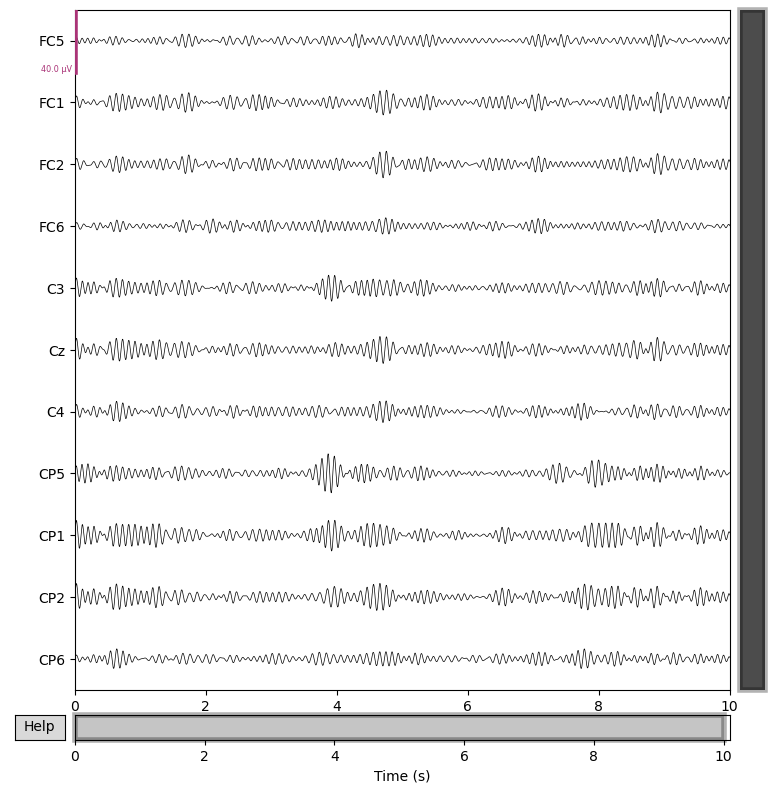

In [37]:
# Let's just apply default FIR filtering

np_eeg = mne.filter.filter_data(np_eeg, sfreq = 1000, l_freq = 8, h_freq = 12, l_trans_bandwidth=0.5, h_trans_bandwidth=0.5, copy = False)

raw = mne.io.RawArray(np_eeg, info)

# Plot the raw data using MNE's plot function
raw.plot()

Visual comparison

In [38]:
df = pd.DataFrame(np_eeg.T)
df.shape

(10095, 11)

Fast Fouriet Transform

In [39]:
MAX_LEN = 10095

def fix_df(df: pd.DataFrame, zero_list_function, MAX_LEN: int):
    df = df.drop(['Unnamed: 0'], axis=1)
    # Преобразование заголовков из str в int ДЛЯ ИЗБЕЖАНИЯ ОШИБОК
    df.columns = list(range(32))
    # ADD EXTRA ROWS HERE
    foundation = [zero_list_function(32) for i in range(MAX_LEN - len(df))]
    foundation = pd.DataFrame(foundation)
    df = pd.concat([df, foundation], ignore_index=True, axis=0)

    channel_names = ['FP1','FP2','F7','F3','Fz','F4','F8','FT9','FC5','FC1',
                'FC2','FC6','FT10','T7','C3','Cz','C4','T8','TP9','CP5',
                'CP1','CP2','CP6','TP10','P7','P3','Pz','P4','P8','O1',
                'Oz','O2']
    
    ch_indices = [i for i, ch_name in enumerate(channel_names) if 'C' in ch_name]
    channel_names = [channel_names[i] for i in ch_indices]

    df = df.iloc[:, ch_indices]

    df_indexes = list(df.columns)
    column_map = {i: j for i, j in zip(df_indexes, channel_names)}
    df = df.rename(columns=column_map)

    # Only select range between 5.5 and 8.5
    # df = df[5500:8500]
    

    return df

In [40]:
df = pd.read_csv('../Motoric NeuroScience Data/left_real/1_1.csv')
df = fix_df(df, zerolistmaker, MAX_LEN)
df

,FC5,FC1,FC2,FC6,C3,Cz,C4,CP5,CP1,CP2,CP6
0,0.000006,5.803684e-06,4.738318e-06,0.000004,0.000007,0.000007,0.000006,5.537414e-06,0.000008,0.000006,3.373209e-06
1,0.000004,3.650995e-06,3.524144e-06,0.000004,0.000006,0.000005,0.000005,3.534705e-06,0.000007,0.000006,2.703430e-06
2,0.000003,1.655570e-06,2.315881e-06,0.000004,0.000005,0.000004,0.000005,1.754070e-06,0.000007,0.000005,2.041446e-06
3,0.000002,-5.128837e-08,1.114016e-06,0.000005,0.000004,0.000003,0.000005,3.521732e-07,0.000006,0.000004,1.404909e-06
4,0.000001,-1.393225e-06,-8.680630e-08,0.000005,0.000003,0.000001,0.000004,-6.205302e-07,0.000005,0.000004,8.197982e-07
...,...,...,...,...,...,...,...,...,...,...,...
10090,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
10091,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
10092,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
10093,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00


In [41]:
dt = 0.001
columns = list(df.columns)

In [42]:
columns

['FC5', 'FC1', 'FC2', 'FC6', 'C3', 'Cz', 'C4', 'CP5', 'CP1', 'CP2', 'CP6']

Пример принта спектра одного из каналов

In [43]:
def fft2all(df, columns, dt):
    fig, axs = plt.subplots(len(columns), 2, figsize=(25, 3*len(columns)))

    for i, label in enumerate(columns):
        # Plot PSD for the baseline
        baseline = df[label][0:5000]
        n = len(baseline)
        fft_data = np.fft.fft(baseline, n)
        # Calculate PSD
        PSD_base = fft_data * np.conj(fft_data) / n
        freq = (1/(dt*n)) * np.arange(n)
        L = np.arange(1, np.floor(n/20), dtype='int')
        # Plot PSD
        plt.sca(axs[i,0])
        plt.plot(freq[L], PSD_base[L], color='c')
        plt.title(f'Baseline for {label}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')
        plt.legend()

        # Plot PSD for the full signal
        data = df[label]
        n = len(data)
        fft_data = np.fft.fft(data, n)
        # Calculate PSD
        PSD_full = fft_data * np.conj(fft_data) / n
        freq = (1/(dt*n)) * np.arange(n)
        L = np.arange(1, np.floor(n/20), dtype='int')
        # Plot PSD
        plt.sca(axs[i,1])
        plt.plot(freq[L], PSD_full[L], color='c')
        plt.title(f'Full signal for {label}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power')

    # Adjust subplot positions
    plt.subplots_adjust(hspace=0.4)

    plt.show()

part_1

/home/cv-worker/anaconda3/envs/neuro/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists

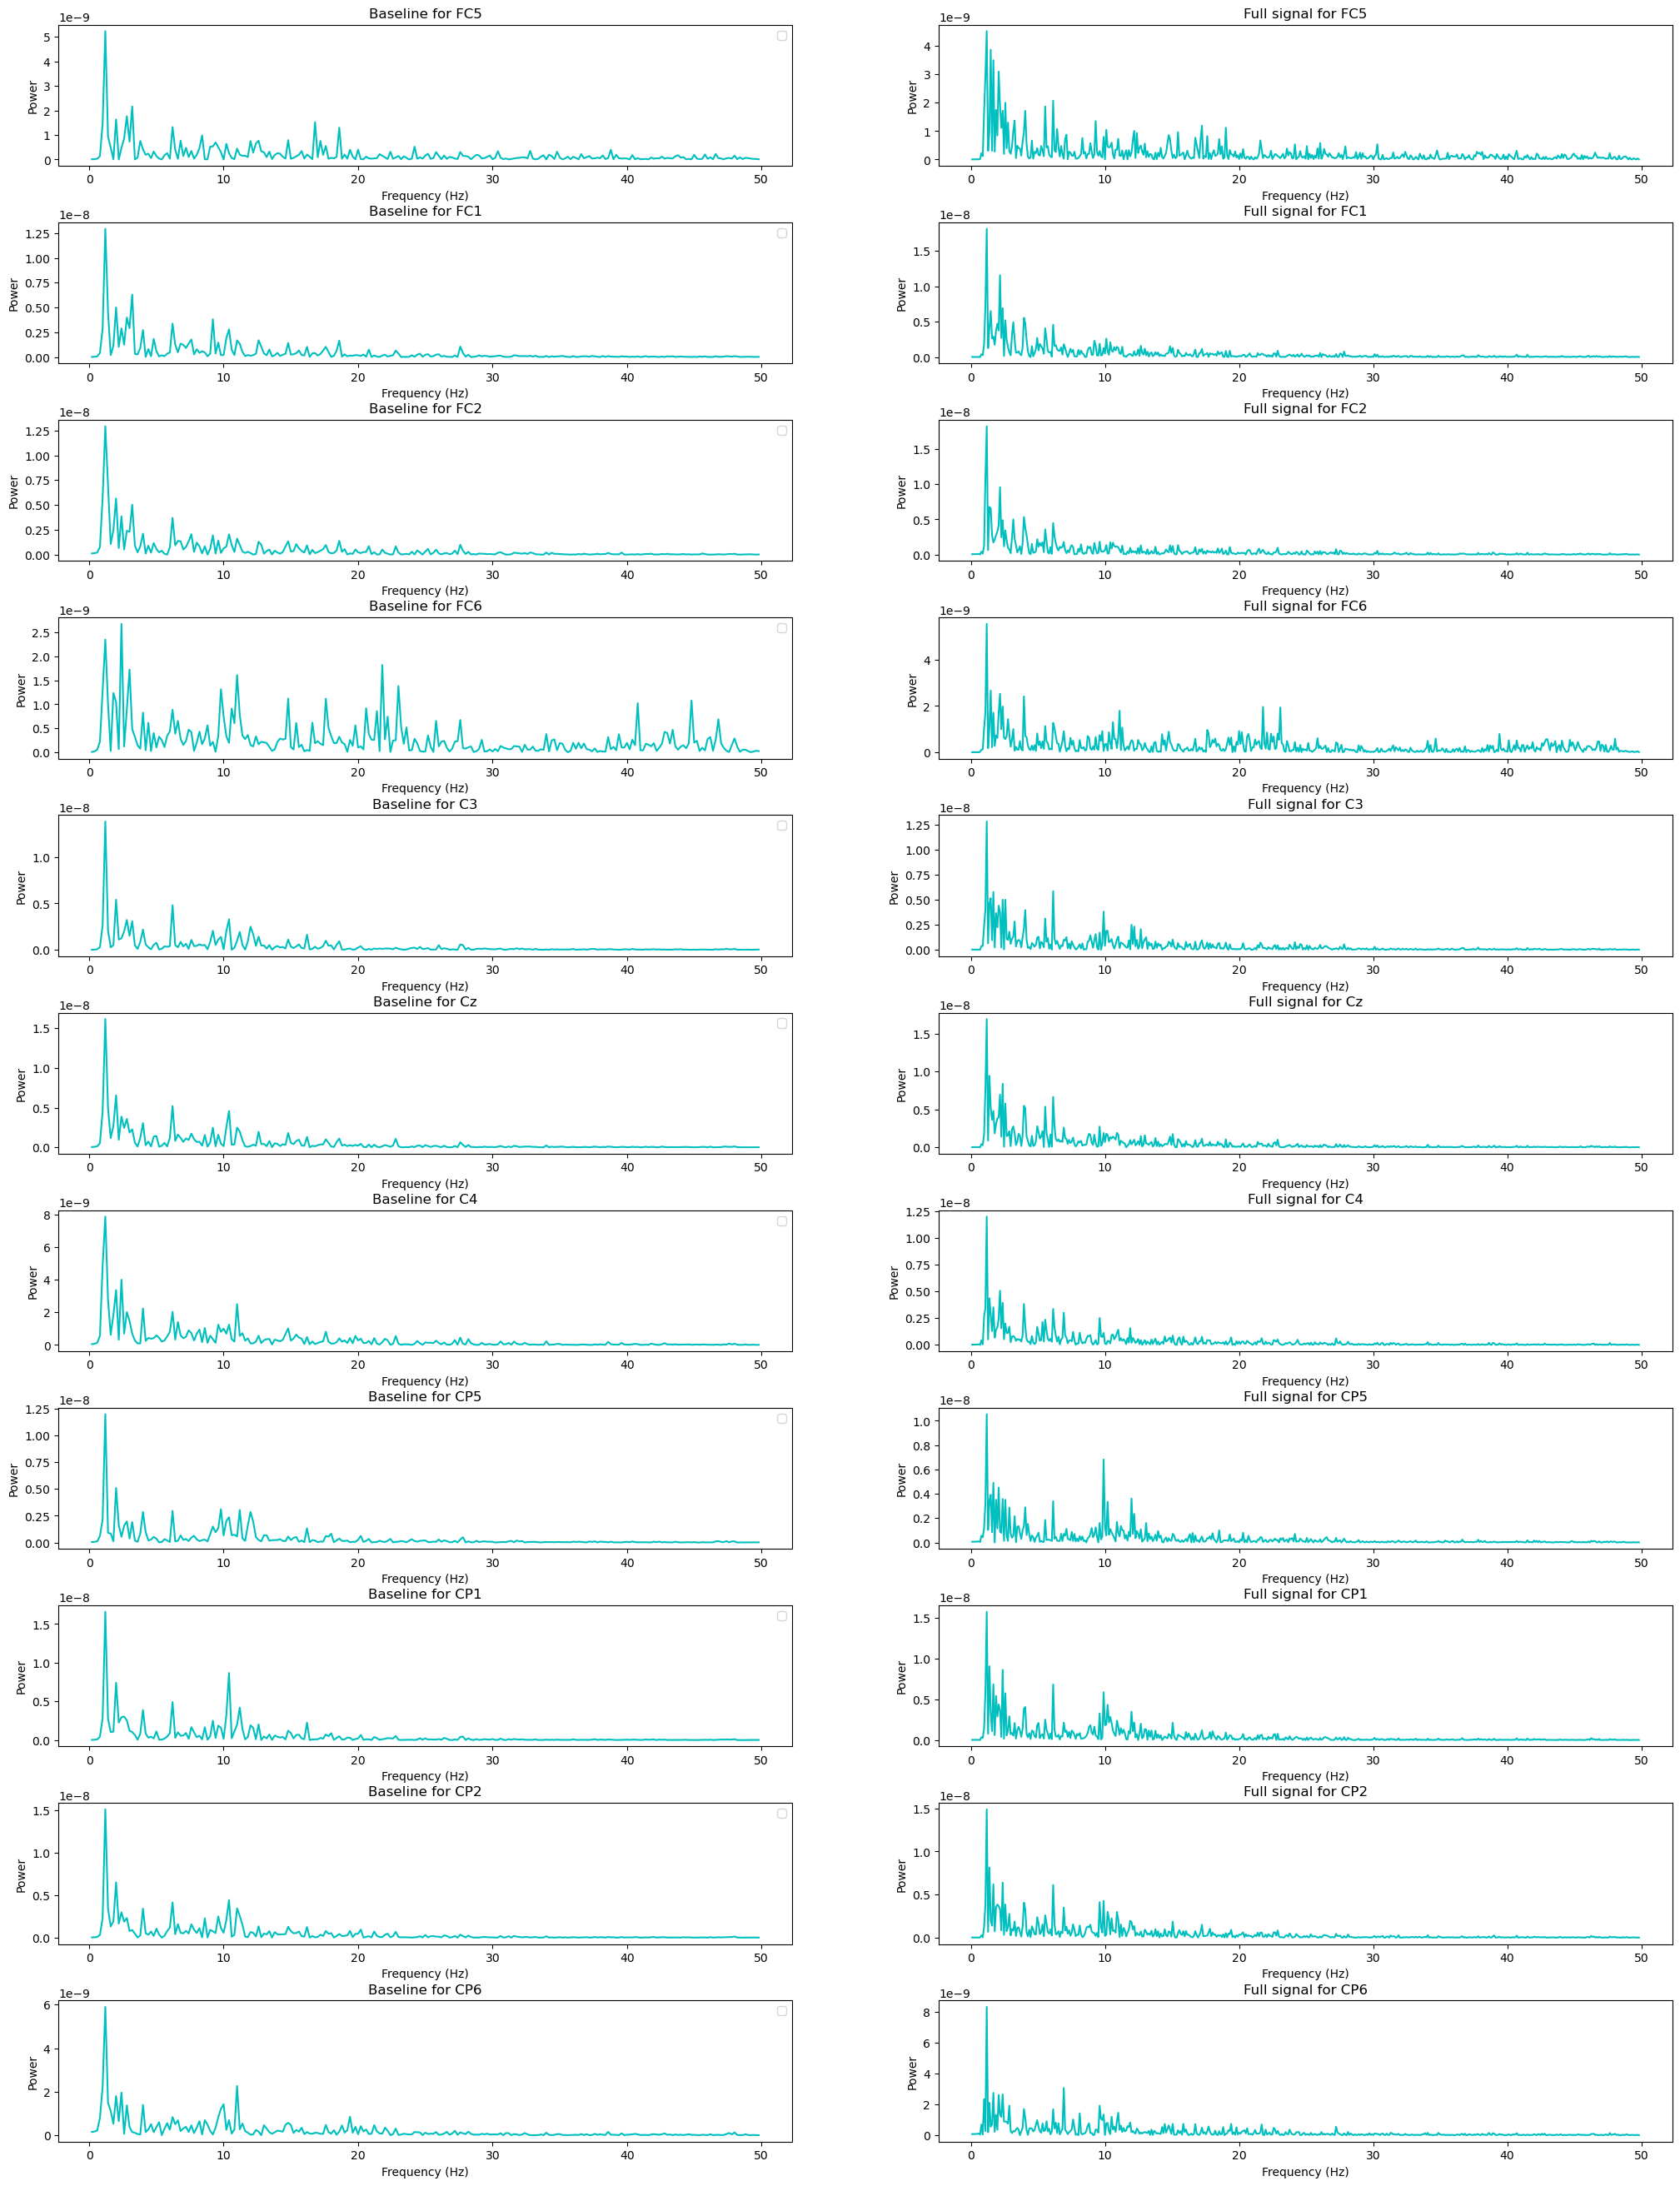

In [44]:
df = pd.read_csv('../Motoric NeuroScience Data/left_real/1_1.csv')
df = fix_df(df, zerolistmaker, MAX_LEN)
fft2all(df = df, columns=columns, dt=dt)

part_2

In [45]:
# df = pd.read_csv('../Motoric NeuroScience Data/left_real/2_12.csv')
# df = fix_df(df, zerolistmaker, MAX_LEN)
# fft2all(df = df, columns=columns, dt=dt)

part_3

In [46]:
# df = pd.read_csv('../Motoric NeuroScience Data/left_real/3_1.csv')
# df = fix_df(df, zerolistmaker, MAX_LEN)
# fft2all(df = df, columns=columns, dt=dt)

Change fix_df function

In [47]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
 

In [48]:
def fix_df(df: pd.DataFrame, zero_list_function, MAX_LEN: int,
           channel_names: list, use_only: str, start: int, end: int,
           l_freq: float, h_freq: float, l_trans_bandwidth: float,
           h_trans_bandwidth: float):

    df = df.drop(['Unnamed: 0'], axis=1)
    # Преобразование заголовков из str в int ДЛЯ ИЗБЕЖАНИЯ ОШИБОК
    df.columns = list(range(32))
    # ADD EXTRA ROWS HERE
    foundation = [zero_list_function(32) for i in range(MAX_LEN - len(df))]
    foundation = pd.DataFrame(foundation)
    df = pd.concat([df, foundation], ignore_index=True, axis=0)

    channel_types = ['eeg']*32
    ch_indices = [i for i, ch_name in enumerate(
        channel_names) if use_only in ch_name]
    channel_names = [channel_names[i] for i in ch_indices]
    channel_types = [channel_types[i] for i in ch_indices]

    # Create an info object that defines the channel names, types, and sampling frequency
    info = mne.create_info(ch_names=channel_names,
                           sfreq=1000, ch_types=channel_types)
    np_eeg = df.iloc[:, ch_indices].to_numpy().T

    # Baseline correction
    times = np.linspace(0, 10.094, 10095)
    np_eeg = mne.baseline.rescale(
        np_eeg, times, (0., 5.0), mode='mean', copy=False, verbose=False)

    # Let's just apply default FIR filtering
    np_eeg = mne.filter.filter_data(np_eeg, sfreq=1000, l_freq=l_freq, h_freq=h_freq,
                                    l_trans_bandwidth=l_trans_bandwidth, h_trans_bandwidth=h_trans_bandwidth,
                                    copy=False, verbose=False)

    df = pd.DataFrame(np_eeg.T)
    # Only select desired range
    df = df[start:end]
    return df

In [49]:
channel_names = ['FP1', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FC5', 'FC1',
                 'FC2', 'FC6', 'FT10', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5',
                 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1',
                 'Oz', 'O2']
use_only = 'C'


In [50]:
df = pd.read_csv('../Motoric NeuroScience Data/left_real/1_1.csv')

df = fix_df(df, zerolistmaker, MAX_LEN,
                      channel_names, use_only,
                      5000, 10000, 9,
                      11, 0.5, 0.5)

df

,0,1,2,3,4,5,6,7,8,9,10
5000,-7.027986e-07,-2.164691e-07,1.790546e-07,-4.782223e-07,-4.190739e-07,-2.696203e-07,-5.058447e-07,-5.462567e-08,-6.835428e-07,-8.461509e-07,-6.344210e-07
5001,-8.576691e-07,-3.877550e-07,6.140361e-08,-4.123967e-07,-6.501759e-07,-3.724121e-07,-5.080488e-07,-2.294932e-07,-8.031950e-07,-8.626560e-07,-5.576321e-07
5002,-1.010156e-06,-5.576185e-07,-5.704700e-08,-3.463804e-07,-8.791398e-07,-4.736801e-07,-5.092804e-07,-4.033557e-07,-9.193157e-07,-8.759266e-07,-4.796795e-07
5003,-1.159695e-06,-7.255346e-07,-1.759965e-07,-2.805277e-07,-1.105162e-06,-5.732031e-07,-5.097060e-07,-5.756146e-07,-1.031599e-06,-8.861187e-07,-4.010130e-07
5004,-1.305726e-06,-8.909835e-07,-2.951366e-07,-2.151846e-07,-1.327445e-06,-6.707642e-07,-5.094874e-07,-7.456764e-07,-1.139751e-06,-8.933952e-07,-3.220788e-07
...,...,...,...,...,...,...,...,...,...,...,...
9995,8.934659e-07,1.777477e-06,1.627457e-06,7.895818e-07,1.247183e-06,1.499559e-06,1.078682e-06,4.550667e-07,1.295478e-06,1.101852e-06,7.417224e-07
9996,8.927694e-07,1.781781e-06,1.640774e-06,7.794991e-07,1.280664e-06,1.515079e-06,1.104160e-06,5.156996e-07,1.336120e-06,1.132878e-06,7.916319e-07
9997,8.885695e-07,1.779419e-06,1.648136e-06,7.667548e-07,1.309645e-06,1.525079e-06,1.125769e-06,5.748687e-07,1.372168e-06,1.159889e-06,8.387103e-07
9998,8.809370e-07,1.770509e-06,1.649607e-06,7.514338e-07,1.334068e-06,1.529597e-06,1.143475e-06,6.323451e-07,1.403539e-06,1.182829e-06,8.828094e-07


In [51]:
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.368405,-0.070910,0.066462,-0.268818,-0.156477,-0.080585,-0.221209,-0.022043,-0.216757,-0.293056,-0.330308
1,-0.449687,-0.131265,0.023149,-0.232725,-0.240449,-0.114775,-0.222199,-0.104294,-0.254640,-0.299027,-0.290000
2,-0.529717,-0.191119,-0.020460,-0.196527,-0.323645,-0.148458,-0.222753,-0.186072,-0.291405,-0.303829,-0.249080
3,-0.608201,-0.250286,-0.064251,-0.160418,-0.405772,-0.181560,-0.222944,-0.267096,-0.326954,-0.307516,-0.207786
4,-0.684843,-0.308584,-0.108113,-0.124589,-0.486540,-0.214010,-0.222846,-0.347087,-0.361196,-0.310149,-0.166352
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.469371,0.631682,0.599699,0.426346,0.448970,0.507864,0.490903,0.217696,0.409816,0.411734,0.392064
4996,0.469006,0.633198,0.604601,0.420817,0.461136,0.513026,0.502353,0.246215,0.422684,0.422960,0.418263
4997,0.466802,0.632366,0.607312,0.413829,0.471666,0.516353,0.512064,0.274046,0.434097,0.432732,0.442975
4998,0.462796,0.629226,0.607854,0.405428,0.480541,0.517855,0.520022,0.301081,0.444029,0.441032,0.466124


In [52]:
df.shape

(5000, 11)

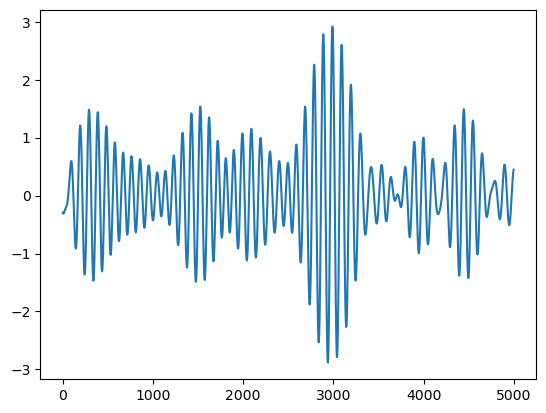

In [53]:
plt.plot(df[9])
plt.show()

Let's analyze scaled data

### 5. Analyzing open-source motoral EEG dataset

Unzipping file

In [54]:
# Unzipping file
import zipfile
 
with zipfile.ZipFile('../BCICIV_2a_gdf.zip', 'r') as zip_ref:
    zip_ref.extractall('../.')


In [55]:
patient = 9

file_1 = mne.io.read_raw_gdf(f'../BCI_C_IV/Train_uncut/A0{patient}T.gdf')
data_1 = file_1.get_data()
df_1 = pd.DataFrame(data_1.T)

Extracting EDF parameters from /mnt/nikita_disk/Neuroscience/BCI_C_IV/Train_uncut/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/home/cv-worker/anaconda3/envs/neuro/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [236]:
channel_names_A01E = ['EEG-Fz', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG-C3', 'EEG',
                    'EEG-Cz', 'EEG', 'EEG-C4', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 
                    'EEG', 'EEG', 'EEG-Pz', 'EEG', 'EEG', 'EOG-left', 'EOG-central', 'EOG-right']
channel_types_A01E = ['eeg']*25

print(file_1.get_data().shape)
print(len(channel_names_A01E))
print(len(channel_types_A01E))

# Create an info object that defines the channel names, types, and sampling frequency
info_A01E = mne.create_info(ch_names=channel_names_A01E, sfreq=250, ch_types=channel_types_A01E)

raw_A01E = mne.io.RawArray(file_1.get_data(), info=info_A01E)
# raw_A01E.plot()

file_1_folder = '../BCI_C_IV/Train_cut/'
desired_events = ('769', '770')
# 769 - left
# 770 - right
start = '2005-01-17 12:00:00.000'
delta = 0.004
freq = 250
duration = 7.5

ann = file_1.annotations.to_data_frame()
ann_length = ann.shape[0]

Extracting EDF parameters from /mnt/nikita_disk/Neuroscience/BCI_C_IV/Train_uncut/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/home/cv-worker/anaconda3/envs/neuro/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


(25, 673328)
25
25


/tmp/ipykernel_57766/570353258.py:17: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  info_A01E = mne.create_info(ch_names=channel_names_A01E, sfreq=250, ch_types=channel_types_A01E)


Creating RawArray with float64 data, n_channels=25, n_times=673328
    Range : 0 ... 673327 =      0.000 ...  2693.308 secs
Ready.


Cutting GDF file according to annotation

In [ ]:
def get_timestamp(simple_stamp, freq):
    time = simple_stamp.split()[-1].split(':')
    mins = int(time[1])
    secs = float(time[2])
    total_secs = 60*mins + secs
    timepoint = int(total_secs*freq)
    return timepoint


In [ ]:
cleared_ann = pd.DataFrame(columns=['onset', 'label'])

for i in range(ann_length):
    label = ann.iloc[i]['description']
    if label in desired_events:
        if label == '769':
            label = 'left'
        else:
            label = 'right'
        cleared_ann = cleared_ann.append({'onset': get_timestamp(str(ann.iloc[i-1]['onset']), freq), 'label': label}, ignore_index=True)

cleared_ann


Cutting data onto .csv files

In [ ]:
for index, row in cleared_ann.iterrows():
    df = df_1[row.onset: row.onset + int(duration*freq)]
    df.to_csv(f'{file_1_folder}/{row.label}/{patient}_{index}.csv')

### 6. Testing new LSTM-CNN model

https://medium.com/@mixanyy/different-ways-to-combine-cnn-and-lstm-networks-for-time-series-classification-tasks-b03fc37e91b6

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from torch import nn
from torch.nn import functional as F
from torchmetrics.classification import F1Score

log_folder = '../runs/FRACTION_LSTM_3_motoric'
writer = SummaryWriter(log_folder)
writer.add_text('TEXT', 'Start model training', 0)

In [ ]:
class LSTM_CNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_CNN, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=hidden_size, out_channels=64,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=64),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=32,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=32),
            nn.MaxPool1d(kernel_size=2, stride=2),
            # flatten
            nn.Flatten(),
            nn.LazyLinear(out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=num_classes)
        )

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out.permute(0, 2, 1)
        out = self.cnn(out)
        return out

In [ ]:
a = np.random.rand(1,5000,11)
t = torch.from_numpy(a).float()

model = LSTM_CNN(input_size=11, hidden_size = 128, num_layers=1, num_classes=2)

# a = nn.Conv1d(in_channels=self.in_channels,
#                                out_channels=32, kernel_size=2, stride=2, padding=0)

t = model(t)


In [ ]:
b = np.random.rand(1,128,5000)
t = torch.from_numpy(b).float()

cnn = nn.Sequential(
            nn.Conv1d(in_channels=128, out_channels=64,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=64),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=32,
                      kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=32),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Flatten(),   # 1 * 40000
            nn.LazyLinear(out_features=32),)

t = cnn(t)


In [ ]:
t.shape

In [ ]:
from torchinfo import summary

# This should help with VISUALIZING MODEL ARCHITECTURE

dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

summary(model = LSTM_CNN(input_size=11, hidden_size = 128, num_layers=1, num_classes=2),
        input_size=(1, 5000, 128), col_names=["kernel_size", "input_size", "output_size", "num_params"], 
        verbose=2)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, filenames: list, classes: dict, MAX_LEN: int,
                 channel_names: list, use_only: str, start: int, end: int,
                 l_freq: float, h_freq: float, l_trans_bandwidth: float,
                 h_trans_bandwidth: float, model: str = 'LSTM'):

        self.filenames = filenames
        self.classes = classes
        self.MAX_LEN = MAX_LEN
        self.channel_names = channel_names
        self.use_only = use_only
        self.start = start
        self.end = end
        self.l_freq = l_freq
        self.h_freq = h_freq
        self.l_trans_bandwidth = l_trans_bandwidth
        self.h_trans_bandwidth = h_trans_bandwidth
        self.model = model

    def __len__(self):
        return int(len(self.filenames))

    def __getitem__(self, idx):

        data = pd.read_csv(self.filenames[idx])
        data = fix_df(data, zerolistmaker, self.MAX_LEN,
                      self.channel_names, self.use_only,
                      self.start, self.end, self.l_freq,
                      self.h_freq, self.l_trans_bandwidth,
                      self.h_trans_bandwidth)

        if self.model == 'LSTM':
            data = torch.from_numpy(np.asarray(data)).float()
        elif self.model == 'ChronoNet':
            data = torch.from_numpy(np.moveaxis(
                np.asarray(data), 0, 1)).float()

        splitted_name = self.filenames[idx].split('/')
        class_label = splitted_name[2]

        label = self.classes[class_label]
        if idx == self.__len__():
            raise IndexError

        return data, label

In [ ]:
class LSTMClassifier(nn.Module):
    """Very simple implementation of LSTM-based time-series classifier."""

    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.batch_size = None
        self.hidden = None

    def forward(self, x):
        h0, c0 = self.init_hidden(x)
        out, (hn, cn) = self.rnn(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

    def init_hidden(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, dtype=torch.float64)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, dtype=torch.float64)
        return [t.cuda() for t in (h0, c0)]


In [ ]:
train_dl_original = DataLoader(CustomDataset(
    filenames=iteration_original.train_set, classes=classes, MAX_LEN=MAX_LEN,
    channel_names=channel_names, use_only=use_only, start=5000,
    end=10000, l_freq=9, h_freq=11, l_trans_bandwidth=0.5,
    h_trans_bandwidth=0.5), batch_size=2, shuffle=True)

val_dl_original = DataLoader(CustomDataset(
    filenames=iteration_original.valid_set, classes=classes, MAX_LEN=MAX_LEN,
    channel_names=channel_names, use_only=use_only, start=5000,
    end=10000, l_freq=9, h_freq=11, l_trans_bandwidth=0.5,
    h_trans_bandwidth=0.5), batch_size=2, shuffle=True)

for i, (data, label) in enumerate(train_dl_original):
    print(
        f"Our DataLoader returns {type(data)} and it's example is {data.shape}")
    # print(f"Data looks like this {data}")
    seq_length = data.shape[2]
    print(f'Seq_lenght is {seq_length}')
    print(f'Type of data is {data[1,:,-1][-1].dtype}')
    print(f"Our label is {label[-1]} and it's type is {label[-1].dtype}")
    if i == 0:
        break

In [ ]:
print(f'Type of data is {data[1,:,:].shape}')

In [ ]:
input_dim = 32
hidden_dim = 256
layer_dim = 3      # Number of LSTM layers
output_dim = 2


lr = 0.05
n_epochs = 50
best_f1 = 0
patience, trials = 15, 0

In [ ]:
model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim)
model = model.cuda()
# nn.CrossEntropyLoss is a loss function, that applies Softmax automatically
criterion = nn.CrossEntropyLoss()
opt = torch.optim.RMSprop(model.parameters(), lr=lr)

In [ ]:
from torchinfo import summary

# This should help with VISUALIZING MODEL ARCHITECTURE

dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

summary(LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim),
        input_size=(5, 1438, 31), col_names=["kernel_size", "input_size", "output_size", "num_params"], 
        verbose=2)


In [ ]:
for epoch in range(1, n_epochs + 1):

    for i, (x_batch, y_batch) in enumerate(train_dl_original):
        model.train()
        x_batch = x_batch.cuda()
        # print(f'x_batch is {x_batch}')
        y_batch = y_batch.cuda()
        opt.zero_grad()
        # SOFTMAX is not needed, because
        # OUR LOSS Function applies it for us
        out = model(x_batch)

        # print(f'model output is {out}')
        # print(f'y_batch is {y_batch}')

        loss = criterion(out, y_batch)
        writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()
        opt.step()
 
    model.eval()
    correct, total = 0, 0
    for x_val, y_val in val_dl_original:
        x_val, y_val = [t.cuda() for t in (x_val, y_val)]
        # Forward pass
        out = model(x_val)

        # Use Softmax for classification
        preds = F.log_softmax(out, dim=1)
        preds = preds.argmax(dim=1)

        total += y_val.size(0)
        correct += (preds == y_val).sum().item()

    # ACTUALLY, IT'S A ACCURACY
    f1 = correct / total
    writer.add_scalar("Accuracy_score", f1, epoch)

    if epoch % 5 == 0:
        print(f'Epoch: {epoch:3d}. Loss: {loss.item():.4f}. f1.: {f1:2.2%}')

    if f1 > best_f1:
        trials = 0
        best_f1 = f1
        torch.save(model.state_dict(), 'best.pth')
        print(f'Epoch {epoch} best model saved with f1: {best_f1:2.2%}')
    else:
        trials += 1
        if trials >= patience:
            print(f'Early stopping on epoch {epoch}')
            break
print('The training is finished! Restoring the best model weights')